In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

D:\SoftwareCode\Anaconda\Anaconda_install\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## 1. Prepocess

In [2]:
train_data = pd.read_csv(".//dataset//w5//adult.data",header = None,names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',  'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])
test_data = pd.read_csv(".//dataset//w5//adult.test",header = None,skiprows = 1,names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',  'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])
train_data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# test_data.head()

In [4]:
train_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# train_data =  train_data.drop('capital-loss', axis=1)

In [6]:
# def prepocess(df):
#     df =  df.drop(['capital-gain','capital-loss'], axis=1)
#     return df
    
# train_data = prepocess(train_data)
# test_data = prepocess(test_data)

#### Prepocess - missing value

In [7]:
def dataprocess(df):
    df.replace(" ?", pd.NaT, inplace = True)
    df.replace(" >50K", 1, inplace = True)
    df.replace(" <=50K", 0, inplace = True)
    # The below code is used soecially for test data
    df.replace(" >50K.", 1, inplace = True)
    df.replace(" <=50K.", 0, inplace = True)
    trans = {'workclass' : df['workclass'].mode()[0], 'occupation' : df['occupation'].mode()[0], 'native-country' : df['native-country'].mode()[0]}
    df.fillna(trans, inplace = True)
    return df
    
train_data = dataprocess(train_data)
test_data = dataprocess(test_data)

#### Prepocess - encode discrete data

In [8]:
def checkObject(df):
    df_columns = list(df.columns)
    object_columns = df.dtypes=="object"
    object_columns = list(object_columns[object_columns].index)
    print(object_columns)
#     object_index = []
#     for i in object_columns:
#         object_index.append(df_columns.index(i))
#     print(object_index)
    return object_columns

object_columns = checkObject(train_data)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# encode data with LabelEncoder or OneHotEncoder
def encodeLabel(train_data,test_data):
    for i in object_columns:
        le=LabelEncoder()
        train_data[i]=le.fit_transform(train_data[i])
        test_data[i]=le.transform(test_data[i])
    return train_data,test_data

def encodeOneHot(train,test,object_columns):
    for i in object_columns:
        enc=OneHotEncoder(sparse=False) 
        arr= enc.fit_transform(train[i].values.reshape((-1,1)))
        arr_test = enc.transform(test[i].values.reshape((-1,1)))
   
        encoded_df = pd.DataFrame(arr,columns = enc.get_feature_names())
        encoded_df_test = pd.DataFrame(arr_test,columns = enc.get_feature_names())
    
        train = train.drop([i], axis=1)
        train = pd.concat([train, encoded_df], axis=1)
    
        test = test.drop([i], axis=1)
        test = pd.concat([test, encoded_df_test], axis=1)
    return train,test

# train,test = encodeLabel(train_data,test_data)
train,test = encodeOneHot(train_data,test_data,object_columns)

In [10]:
train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,x0_ Federal-gov,x0_ Local-gov,x0_ Never-worked,...,x0_ Portugal,x0_ Puerto-Rico,x0_ Scotland,x0_ South,x0_ Taiwan,x0_ Thailand,x0_ Trinadad&Tobago,x0_ United-States,x0_ Vietnam,x0_ Yugoslavia
0,39,77516,13,2174,0,40,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,83311,13,0,0,13,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,215646,9,0,0,40,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,234721,7,0,0,40,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,338409,13,0,0,40,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
test.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,x0_ Federal-gov,x0_ Local-gov,x0_ Never-worked,...,x0_ Portugal,x0_ Puerto-Rico,x0_ Scotland,x0_ South,x0_ Taiwan,x0_ Thailand,x0_ Trinadad&Tobago,x0_ United-States,x0_ Vietnam,x0_ Yugoslavia
0,25,226802,7,0,0,40,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38,89814,9,0,0,50,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,28,336951,12,0,0,40,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,44,160323,10,7688,0,40,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,18,103497,10,0,0,30,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
train_x =  train.drop('income', axis=1)
train_x.head()
train_y =  train['income']
train_y.head()

test_x =  test.drop('income', axis=1)
test_y =  test['income']

## 2. FE &FS

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile, chi2

In [14]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [15]:
# select = SelectPercentile(chi2, percentile=80)
# train_x = select.fit_transform(train_x,train_y)
# test_x = select.transform(test_x)

In [16]:
# pca = PCA(n_components=80)
# # pca = PCA()
# train_x = pca.fit_transform(train_x)
# test_x = pca.transform(test_x)

In [17]:
train_x = pd.DataFrame(train_x)
train_x.head()

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
test_x = pd.DataFrame(test_x)
test_x.head()

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,0.109589,0.145690,0.400000,0.000000,0.0,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.287671,0.052654,0.533333,0.000000,0.0,0.500000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.150685,0.220498,0.733333,0.000000,0.0,0.397959,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.369863,0.100541,0.600000,0.076881,0.0,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.013699,0.061947,0.600000,0.000000,0.0,0.295918,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## 3. Model

### 3.1 Decision Tree

In [175]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="gini")
dt.fit(train_x, train_y)
y_pred = dt.predict(test_x)
print(dt.score(test_x,test_y))

0.8129721761562557


In [176]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="gini",random_state=7).fit(train_x, train_y)
classifier.predict(test_x)
print("Mean accuracy of DecisionTreeClassifier:")
print(classifier.score(test_x,test_y))
print("depth",classifier.get_depth())

Mean accuracy of DecisionTreeClassifier:
0.8119280142497389
depth 51


max_depth score:  0.8613107302991216
max_depth:  10


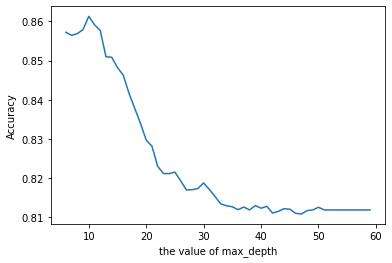

In [177]:
depth_score = []
#最大深度的影响
for i in range(6,60):
    classifier = DecisionTreeClassifier(criterion="gini",max_depth=i,random_state=7).fit(train_x, train_y)
    classifier.predict(test_x)
    score = classifier.score(test_x,test_y)
    depth_score.append(score)
    
print("max_depth score: ",max(depth_score)) #返回最大值
print("max_depth: ",depth_score.index(max(depth_score))+6) # 返回最大值的索引

plt.plot(range(6,60), depth_score)
plt.xlabel('the value of max_depth')
plt.ylabel('Accuracy')
plt.show()

max_depth score:  0.861249309010503
max_depth:  10


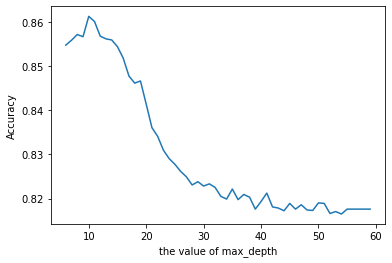

In [21]:
depth_score = []
#最大深度的影响
for i in range(6,60):
    classifier = DecisionTreeClassifier(criterion="entropy",max_depth=i,random_state=7).fit(train_x, train_y)
    classifier.predict(test_x)
    score = classifier.score(test_x,test_y)
    depth_score.append(score)
    
print("max_depth score: ",max(depth_score)) #返回最大值
print("max_depth: ",depth_score.index(max(depth_score))+6) # 返回最大值的索引

plt.plot(range(6,60), depth_score)
plt.xlabel('the value of max_depth')
plt.ylabel('Accuracy')
plt.show()

min_samples_leaf score:  0.8627848412259689
min_samples_leaf:  8


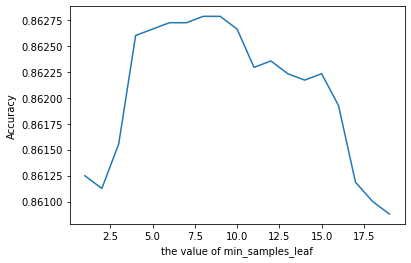

In [22]:
depth_score = []

for i in range(1,20):
    classifier = DecisionTreeClassifier(criterion="entropy",max_depth=10,min_samples_leaf=i,random_state=7).fit(train_x, train_y)
    classifier.predict(test_x)
    score = classifier.score(test_x,test_y)
    depth_score.append(score)
    
print("min_samples_leaf score: ",max(depth_score)) #返回最大值
print("min_samples_leaf: ",depth_score.index(max(depth_score))+1) # 返回最大值的索引

plt.plot(range(1,20), depth_score)
plt.xlabel('the value of min_samples_leaf')
plt.ylabel('Accuracy')
plt.show()

In [23]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="gini",max_depth=10,min_samples_leaf=8,splitter="random",random_state=7).fit(train_x, train_y)
classifier.predict(test_x)
print("Mean accuracy of DecisionTreeClassifier:")
print(classifier.score(test_x,test_y))

Mean accuracy of DecisionTreeClassifier:
0.843928505620048


### BEST DT

In [178]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="gini",max_depth=10,min_samples_leaf=8,random_state=7).fit(train_x, train_y)
classifier.predict(test_x)
print("Mean accuracy of DecisionTreeClassifier:")
print(classifier.score(test_x,test_y))

Mean accuracy of DecisionTreeClassifier:
0.863091947669062


### 3.2 KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=15).fit(train_x, train_y)
classifier.predict(test_x)
score = classifier.score(test_x,test_y)
score

D:\SoftwareCode\Anaconda\Anaconda_install\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\SoftwareCode\Anaconda\Anaconda_install\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

0.8327498310914563

D:\SoftwareCode\Anaconda\Anaconda_install\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\SoftwareCode\Anaconda\Anaconda_install\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

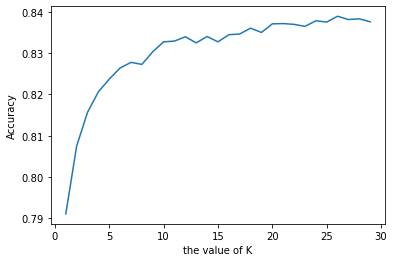

the highest accuracy: 0.8389533812419384


In [20]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
k_score = []
k_range = range(1,30)
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors=k).fit(train_x, train_y)
    classifier.predict(test_x)
    score = classifier.score(test_x,test_y)
    k_score.append(score)
#     print(k,' ',score)

#画图
plt.plot(k_range, k_score)
plt.xlabel('the value of K')
plt.ylabel('Accuracy')
plt.show()

print('the highest accuracy:',max(k_score))

D:\SoftwareCode\Anaconda\Anaconda_install\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\SoftwareCode\Anaconda\Anaconda_install\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

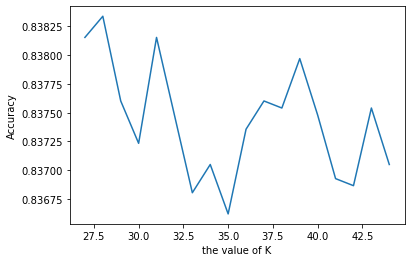

the highest accuracy: 0.8383391683557521


In [21]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
k_score = []
k_range = range(27,45)
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors=k).fit(train_x, train_y)
    classifier.predict(test_x)
    score = classifier.score(test_x,test_y)
    k_score.append(score)
#     print(k,' ',score)

#画图
plt.plot(k_range, k_score)
plt.xlabel('the value of K')
plt.ylabel('Accuracy')
plt.show()

print('the highest accuracy:',max(k_score))

In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=26, weights="distance").fit(train_x, train_y)
classifier.predict(test_x)
score = classifier.score(test_x,test_y)
score

0.8331797801117867

In [21]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=26, weights="uniform").fit(train_x, train_y)
classifier.predict(test_x)
score = classifier.score(test_x,test_y)
score

D:\SoftwareCode\Anaconda\Anaconda_install\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\SoftwareCode\Anaconda\Anaconda_install\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

0.8389533812419384

## Compariation

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score
from sklearn.metrics import classification_report
import time

In [50]:
from sklearn.tree import DecisionTreeClassifier
start =time.time()
classifier = DecisionTreeClassifier(criterion="gini",max_depth=10,min_samples_leaf=8,random_state=7).fit(train_x, train_y)
y_pred = classifier.predict(test_x)
end=time.time()
print('Running time: %s Seconds'%(end-start))
print("Mean accuracy of DecisionTreeClassifier:")
print(classifier.score(test_x,test_y))

Running time: 0.29752683639526367 Seconds
Mean accuracy of DecisionTreeClassifier:
0.863091947669062


In [42]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     12435
           1       0.77      0.60      0.67      3846

    accuracy                           0.86     16281
   macro avg       0.83      0.77      0.79     16281
weighted avg       0.86      0.86      0.86     16281



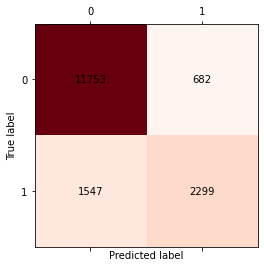

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_pred = y_pred
y_true = test_y
# 对上面进行赋值

C = confusion_matrix(y_true, y_pred) # 可将'1'等替换成自己的类别，如'cat'。

plt.matshow(C, cmap=plt.cm.Reds) # 根据最下面的图按自己需求更改颜色
# plt.colorbar()

for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')

# plt.tick_params(labelsize=15) # 设置左边和上面的label类别如0,1,2,3,4的字体大小。

plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.ylabel('True label', fontdict={'family': 'Times New Roman', 'size': 20}) # 设置字体大小。
# plt.xlabel('Predicted label', fontdict={'family': 'Times New Roman', 'size': 20})
# plt.xticks(range(0,5), labels=['a','b','c','d','e']) # 将x轴或y轴坐标，刻度 替换为文字/字符
# plt.yticks(range(0,5), labels=['a','b','c','d','e'])
plt.show()

In [51]:
from sklearn.neighbors import KNeighborsClassifier
start =time.time()
classifier = KNeighborsClassifier(n_neighbors=26, weights="uniform").fit(train_x, train_y)
y_pred = classifier.predict(test_x)
end=time.time()
print('Running time: %s Seconds'%(end-start))
score = classifier.score(test_x,test_y)
score

D:\SoftwareCode\Anaconda\Anaconda_install\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Running time: 10.699299335479736 Seconds


D:\SoftwareCode\Anaconda\Anaconda_install\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8389533812419384

In [47]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     12435
           1       0.70      0.57      0.62      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.74      0.76     16281
weighted avg       0.83      0.84      0.83     16281



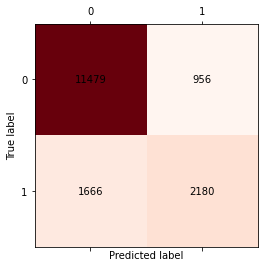

In [48]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_pred = y_pred
y_true = test_y
# 对上面进行赋值

C = confusion_matrix(y_true, y_pred) # 可将'1'等替换成自己的类别，如'cat'。

plt.matshow(C, cmap=plt.cm.Reds) # 根据最下面的图按自己需求更改颜色
# plt.colorbar()

for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')

# plt.tick_params(labelsize=15) # 设置左边和上面的label类别如0,1,2,3,4的字体大小。

plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.ylabel('True label', fontdict={'family': 'Times New Roman', 'size': 20}) # 设置字体大小。
# plt.xlabel('Predicted label', fontdict={'family': 'Times New Roman', 'size': 20})
# plt.xticks(range(0,5), labels=['a','b','c','d','e']) # 将x轴或y轴坐标，刻度 替换为文字/字符
# plt.yticks(range(0,5), labels=['a','b','c','d','e'])
plt.show()